In [1]:
%load_ext autoreload
%autoreload 2

# Support Vector Machine (SVM)

## Iris Dataset

In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()

In [3]:
X_iris = iris.data[:, [2, 3]]
y_iris = iris.target

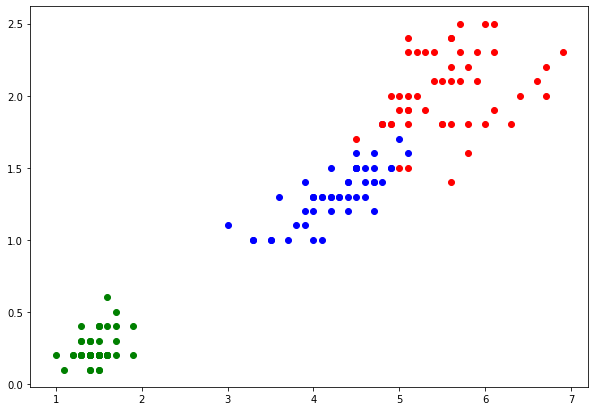

In [5]:
plt.figure(figsize=(10, 7))

for cl, c in zip(np.unique(y_iris), ('green', 'blue', 'red')):
    plt.scatter(X_iris[y_iris==cl, 0], X_iris[y_iris==cl, 1], c=c)
plt.show()

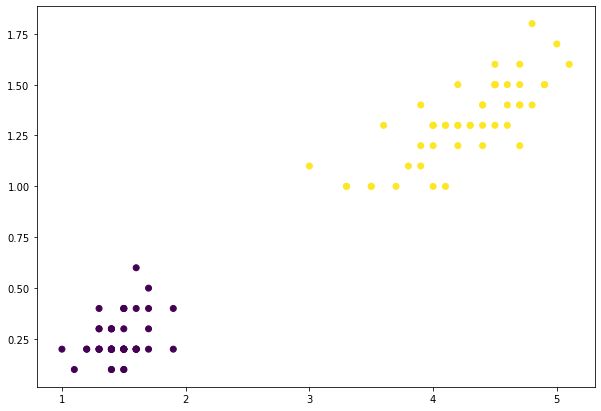

In [43]:
X = X_iris[y_iris != 2]
y = y_iris[y_iris != 2]


import matplotlib.pyplot as plt

plt.figure(figsize=(10 ,7))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='linear', probability=True))
])

In [71]:
model['model'].coef_

array([[1.02948044, 0.92995368]])

In [57]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(kernel='linear', probability=True))])

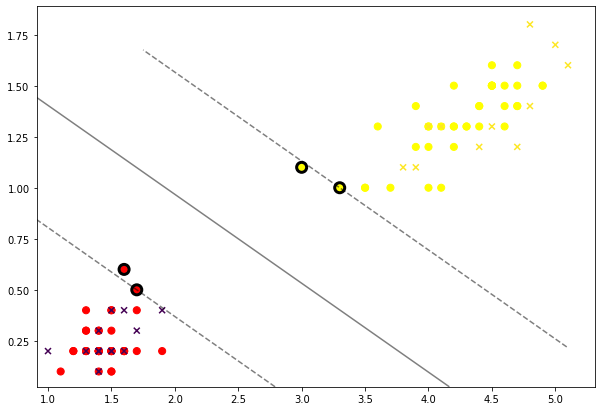

In [58]:
x = X_train
y = y_train
x_test = X_test
estimator = model['model']
scaler = model['scaler']

fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

lin_x = np.linspace(xlim[0], xlim[1], 30)
lin_y = np.linspace(ylim[0], ylim[1], 30)

grid_Y, grid_X = np.meshgrid(lin_y, lin_x)

xy = np.vstack([grid_X.ravel(), grid_Y.ravel()]).T

xy = scaler.transform(xy)

Z = estimator.decision_function(xy).reshape(grid_X.shape)

ax.contour(grid_X, grid_Y, Z,
           colors='k',
           levels=[-1, 0, 1],
           alpha=0.5,
           linestyles=['--', '-', '--']
           )

support_vectors = estimator.support_vectors_

support_vectors = scaler.inverse_transform(support_vectors)

ax.scatter(support_vectors[:, 0], support_vectors[:, 1],
           s=100, linewidth=3, facecolors='none', edgecolors='k')

ax.scatter(x_test[:, 0], x_test[:, 1], marker='x', c=y_test)

plt.show()

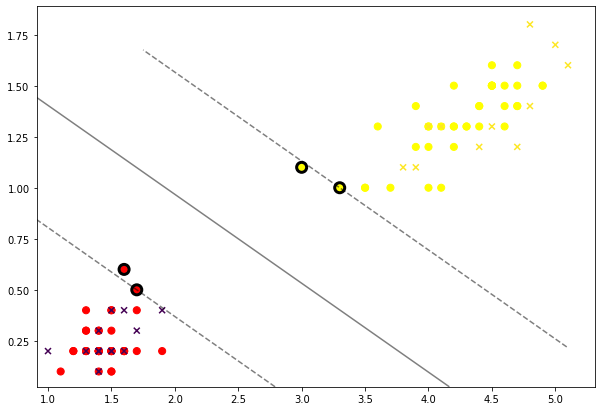

In [59]:
from plot_utils import plot_margins
plot_margins(x=X_train, 
             y=y_train, 
            estimator=model['model'],
            x_test=X_test,
            y_test=y_test,
            scaler=model['scaler'])

In [60]:
from plot_utils import MetricsUtils

metrics = MetricsUtils(x=X_test, y=y_test, estimator=model)


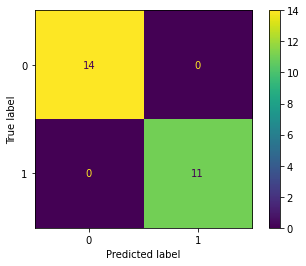

Precision score:	1.00
Recall score:	1.00


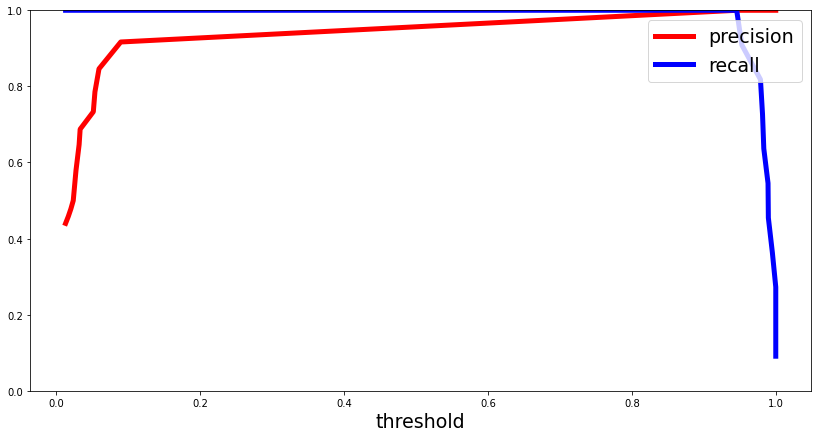

<Figure size 1008x504 with 0 Axes>

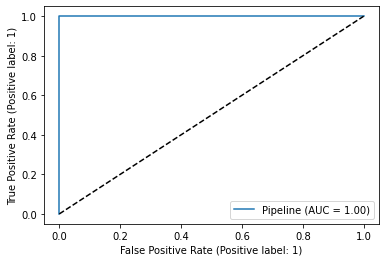

In [61]:
metrics()

### Decision function

The desion function tells us on which side of the hyperplane generated by the classifier we are (and how far we are away from it). Based on that information, the estimator then label the examples with the corresponding label.

> Whether to enable probability estimates. This must be enabled prior to calling fit, will slow down that method as it internally uses 5-fold cross-validation, and predict_proba may be inconsistent with predict. Read more in the [User Guide](https://scikit-learn.org/stable/modules/svm.html#scores-probabilities).

In [62]:
model.predict(X_test)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1])

In [63]:
model.decision_function(X_test)

array([ 3.31266131,  2.01076626,  3.42850868, -1.5525405 , -1.02153256,
       -1.64685528, -2.01076625,  1.53100793, -1.64685528, -1.71963748,
       -1.33419392, -1.57407309,  2.35314464, -1.71963748,  2.13479806,
       -1.71963748,  2.76012078,  3.40697609, -1.88673445, -1.31266133,
        2.37467723,  2.08354846, -1.23987914, -1.79241967,  1.60379012])

In [65]:
model.predict_proba(X_test)

array([[7.28172507e-06, 9.99992718e-01],
       [2.12793310e-02, 9.78720669e-01],
       [4.55284516e-06, 9.99995447e-01],
       [9.66444999e-01, 3.35550006e-02],
       [9.10008322e-01, 8.99916782e-02],
       [9.72234887e-01, 2.77651125e-02],
       [9.86677326e-01, 1.33226741e-02],
       [5.42822060e-02, 9.45717794e-01],
       [9.72234887e-01, 2.77651125e-02],
       [9.76018827e-01, 2.39811727e-02],
       [9.48143975e-01, 5.18560251e-02],
       [9.67863354e-01, 3.21366464e-02],
       [1.07530684e-02, 9.89246932e-01],
       [9.76018827e-01, 2.39811727e-02],
       [1.66326384e-02, 9.83367362e-01],
       [9.76018827e-01, 2.39811727e-02],
       [4.74455972e-03, 9.95255440e-01],
       [4.96808529e-06, 9.99995032e-01],
       [9.82881810e-01, 1.71181901e-02],
       [9.45888900e-01, 5.41111003e-02],
       [1.02989686e-02, 9.89701031e-01],
       [1.84176927e-02, 9.81582307e-01],
       [9.40251147e-01, 5.97488526e-02],
       [9.79291711e-01, 2.07082886e-02],
       [4.720165

# SGD

In [68]:
from sklearn.linear_model import SGDClassifier


sgd_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SGDClassifier(loss='hinge'))
])

sgd_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SGDClassifier())])

In [70]:
sgd_model['model'].coef_

array([[12.52523357,  8.25316155]])

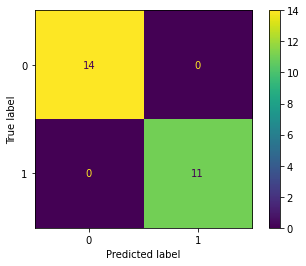

Precision score:	1.00
Recall score:	1.00


AttributeError: probability estimates are not available for loss='hinge'

In [73]:
MetricsUtils(x=X_test, y=y_test, estimator=sgd_model)()